<a href="https://colab.research.google.com/github/muhammadtaqiyuddin/PrediksiCuacaKabupatenSleman/blob/master/Prediksi_cuaca_kabupaten_sleman_dengan_algoritma_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Semester 6/Proyek Data Mining/Dataset/laporan_iklim_harian_1Tahun_Sleman.csv')

# EDA



*   Visualisasi Data
*   Analisis hubungan Antar Fitur



In [ ]:
print("Jumlah baris, kolom:", data.shape)

Jumlah baris, kolom: (366, 11)


In [ ]:
print(data.head())

      Tanggal    Tn    Tx  Tavg  RH_avg      RR   ss  ff_x  ddd_x  ff_avg  \
0  01-01-2023  22.6  31.3  26.1    82.0     0.8  0.2   6.0  280.0     3.0   
1  02-01-2023  23.6  30.4  26.9    78.0     0.0  2.3   8.0  300.0     3.0   
2  03-01-2023  24.2  29.0  26.5    80.0     2.0  3.6   4.0  310.0     2.0   
3  04-01-2023  23.1  30.8  26.3    84.0  8888.0  2.7   6.0  280.0     3.0   
4  05-01-2023  22.8  29.6  25.8    88.0    20.6  5.2   6.0  250.0     3.0   

  ddd_car  
0      W   
1      W   
2      W   
3      W   
4      W   


Analisis Statistik


In [ ]:
print(data.describe())

               Tn          Tx        Tavg      RH_avg           RR  \
count  363.000000  364.000000  364.000000  364.000000   326.000000   
mean    22.849311   31.172527   26.598626   79.197802   359.753374   
std      1.481886    1.409555    1.526632    6.433760  1740.765767   
min     18.200000   24.900000   22.500000   58.000000     0.000000   
25%     22.200000   30.400000   25.600000   76.000000     0.000000   
50%     23.200000   31.200000   26.400000   79.500000     0.000000   
75%     23.800000   32.025000   27.400000   84.000000     3.775000   
max     25.600000   35.600000   31.400000   93.000000  8888.000000   

               ss        ff_x       ddd_x      ff_avg  
count  356.000000  365.000000  365.000000  365.000000  
mean     6.062640    4.890411  241.641096    2.112329  
std      2.926909    1.598090   52.110354    0.676112  
min      0.000000    2.000000    4.000000    1.000000  
25%      3.800000    4.000000  230.000000    2.000000  
50%      6.400000    5.000000  25

Keterangan :
* 8888: data tidak terukur
* 9999: Tidak Ada Data (tidak dilakukan pengukuran)
* "Tn: Temperatur minimum	 (°C)"
* Tx: Temperatur maksimum (°C)
* Tavg: Temperatur rata-rata (°C)
* RH_avg: Kelembapan rata-rata (%)
* RR: Curah hujan (mm)
* ss: Lamanya penyinaran matahari (jam)
* ff_x: Kecepatan angin maksimum (m/s)
* ddd_x: Arah angin saat kecepatan maksimum (°)
* ff_avg: Kecepatan angin rata-rata (m/s)
* ddd_car: Arah angin terbanyak (°)

Identifikasi Nilai Hilang

In [ ]:
data.isnull().sum()

Tanggal     0
Tn          3
Tx          2
Tavg        2
RH_avg      2
RR         40
ss         10
ff_x        1
ddd_x       1
ff_avg      1
ddd_car     1
dtype: int64

Visualisasi

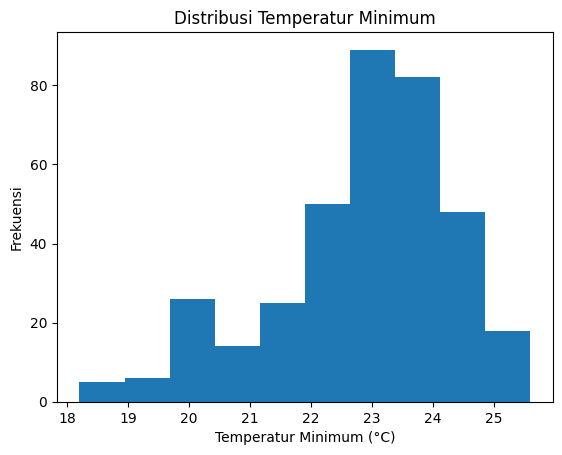

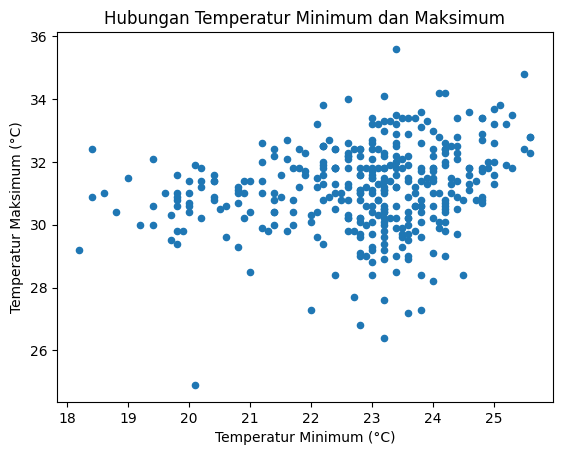

In [ ]:
plt.hist(data['Tn'])
plt.xlabel('Temperatur Minimum (°C)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Temperatur Minimum')
plt.show()

data.plot(x='Tn', y='Tx', kind='scatter')
plt.xlabel('Temperatur Minimum (°C)')
plt.ylabel('Temperatur Maksimum (°C)')
plt.title('Hubungan Temperatur Minimum dan Maksimum')
plt.show()

# Pre Processing Data

* Membersihkan Data dari nilai yang hilang / tidak akurat
* Normalisasi Data Numerik

Mengatasi Nilai Hilang

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Tanggal    0
Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
dtype: int64

Normalisasi Data Numerik

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_numerik = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ff_avg']
data[data_numerik] = scaler.fit_transform(data[data_numerik])

In [ ]:
data = pd.get_dummies(data, columns=['ddd_car'], drop_first=True)

X = data.drop(columns=['Tanggal', 'Tavg'])
y = data['Tavg']

# Spliting Data

* Training Set
* Testing Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 80% data digunakan untuk melatih model dan 20% data digunakan untuk menguji model.

# Pelatihan Model Random Forest

* Pemilihan nilai hyperparameter
* Latih Model

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Evaluasi Model

* Menghitung MAE
* Menghitung MSE
* Menghitung RMSE
* Menghitung R2

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Absolute Error: 0.06025510204081633
Mean Squared Error: 0.008756128072922286
Root Mean Squared Error: 0.09357418486378755
R-squared: 0.6907971130955386


**Kesimpulan**
<br>
MAE yang rendah menunjukkan bahwa rata-rata selisih absolut antara nilai aktual dan nilai prediksi oleh model adalah sekitar 0.06, MSE yang rendah menunjukkan bahwa kesalahan prediksi secara keseluruhan rendah, RMSE yang rendah menunjukkan bahwa kesalahan prediksi secara keseluruhan  rendah, dan nilai R-squared yang tinggi menunjukkan bahwa model berhasil menjelaskan sebagian besar variasi dalam data, yaitu sekitar 69.08%. Oleh karena itu, hasil evaluasi menunjukkan bahwa model Regresi Random Forest cukup baik dalam memprediksi nilai target pada dataset pengujian.

# Prediksi Cuaca

* Memasukkan data baru
* Prediksi cuaca

In [ ]:
import pickle

with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

print("Masukkan data untuk prediksi cuaca:")
temperature = float(input("Rata-rata Temperature 2m: "))
wind_speed = float(input("Kecepatan Angin 10m: "))
humidity = float(input("Kelembaban Relatif: "))
rainfall = float(input("Curah Hujan: "))
radiation = float(input("Radiasi Sinar Matahari: "))

input_data = {
    'Tn': temperature,
    'ff_avg': wind_speed,
    'RH_avg': humidity,
    'RR': rainfall,
    'ss': radiation,
    'ddd_car_E': 0,
    'ddd_car_N': 0,
    'ddd_car_NE': 0,
    'ddd_car_NW': 0,
    'ddd_car_S': 0,
    'ddd_car_SE': 0,
    'ddd_car_SW': 0,
    'ddd_car_W': 0
}

input_df = pd.DataFrame([input_data])

input_df = input_df.rename(columns=lambda x: x.strip())

missing_columns = set(X.columns) - set(input_df.columns)
if missing_columns:
    for column in missing_columns:
        input_df[column] = 0

input_df = input_df[X.columns]

prediction = model.predict(input_df)
print("Prediksi Cuaca:", prediction)

Masukkan data untuk prediksi cuaca:
Rata-rata Temperature 2m: 0
Kecepatan Angin 10m: 0
Kelembaban Relatif: 0
Curah Hujan: 0
Radiasi Sinar Matahari: 0
Prediksi Cuaca: [0.44369048]


**Kesimpulan**
<br> Dari hasil prediksi yang diberikan, dengan rata-rata suhu harian yang diperkirakan sekitar 36.52 derajat Celsius, kita dapat menyimpulkan bahwa kondisi cuaca kemungkinan akan terasa hangat atau bahkan panas.